<a href="https://colab.research.google.com/github/RafaelBNN/es203/blob/main/Trabalho_Computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Neste Notebook, vamos aplicar o método dos elementos finitos para determinar a capacitância de um capacitor e o potencial elétrico num ponto qualquer entre suas placas. A configuração do capacitor é descrita abaixo.

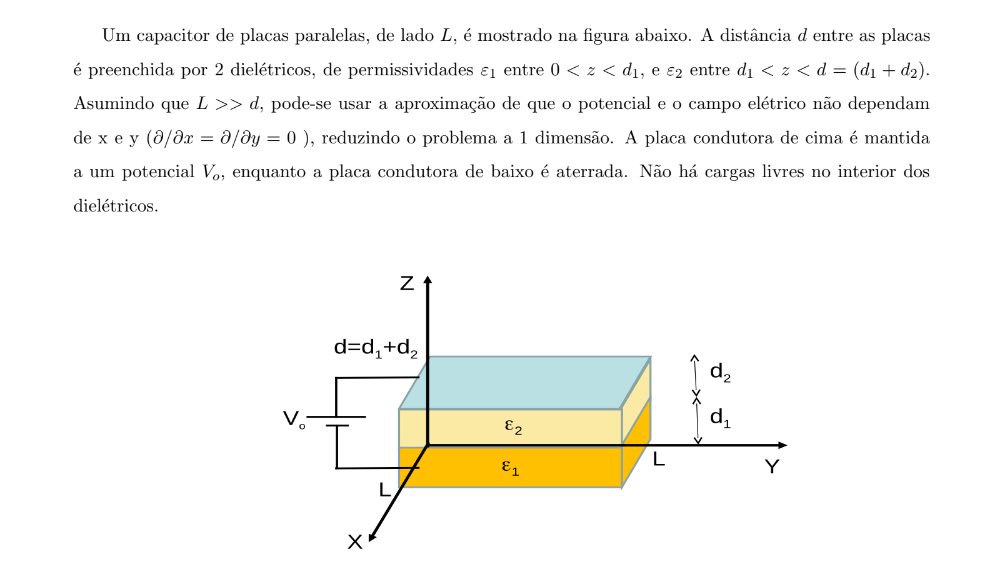

Dito isso, o método dos elementos finitos pode ser dividido em 8 etapas. Vamos aplicá-las, cada uma, passo a passo.

# Passo 1

Inicialmente, para a aplicação do método, deve-se dividir o problema em vários segmentos. No nosso caso, vamos "fatiar" os dois dielétricos com relação ao eixo $z$ da figura em seções de mesmo tamanho. Vamos dividir o primeiro dielétrico (de baixo) em $N_1$ segmentos, e o de cima em $N_2$ segmentos, totalizando $N = N_1 + N_2$ elementos de comprimento em relação ao eixo z $L_1 = d_1/N_1$ e $L_2 = d_2/N_2$.

# Passo 2

Agora, devemos realizar uma aproximação linear do potencial em cada intervalo:

$$V^e(z) = az +b\ ,\ z_e \leq z \leq z_{e+1}$$
$$V^e(z_e) = V_e\ ,\ V_e(z_{e+1}) = V_{e+1}$$

Resolvendo, temos:

$$
V^e(z) = V_eN^e_1(z) + V_{e+1}N^e_2(z)\ ,\  z_e \leq z \leq z_{e+1}
$$
onde
$$
N^e_1(z) = \frac{z_{e+1} - z}{L}\ ,\ N^e_2(z) = \frac{z - z_e}{L}
$$

# Passo 3

Aqui, reescrevemos a equação 
$$
\frac{d}{dx} \left( \epsilon_0 \epsilon_r \frac{dV}{dx} \right) = 0
$$
de forma a obter mais informações dela. Assim, multiplicando essa equação diferencial por uma função $w(x)$, temos:

$$
\int_{x_e}^{x_{e+1}} \frac{d}{dx} \left( \epsilon_0 \epsilon_r^e \frac{dV}{dx} \right) w(x) = 0
$$

Integrando por partes:

$$
\int_{x_e}^{x_{e+1}} \left( \epsilon_0 \epsilon_r^e \frac{dV}{dx} \right) \frac{dw(x)}{dx} = \epsilon_0 \epsilon_r^e \frac{dV(x_{e+1})}{dx}w(x_{e+1}) - \epsilon_0 \epsilon_r^e \frac{dV(x_e)}{dx} w(x_e)
$$

No nosso caso, utizando $z$ no lugar de $x$:

$$
\int_{z_e}^{z_{e+1}} \left( \epsilon_0 \epsilon_r^e \frac{dV}{dz} \right) \frac{dw(z)}{dz} = \epsilon_0 \epsilon_r^e \frac{dV(z_{e+1})}{dz}w(z_{e+1}) - \epsilon_0 \epsilon_r^e \frac{dV(z_e)}{dz} w(z_e)
$$

# Passo 4

Assim, utilizando a função de $V^e(z)$ obtida no Passo 2:

$$
-V_e \frac{\epsilon_0 \epsilon_r^e}{L} + V_{e+1} \frac{\epsilon_0 \epsilon_r^e}{L} = - \epsilon_0 \epsilon_r^e \frac{dV(x_e)}{dx}
$$

$$
V_e \frac{\epsilon_0 \epsilon_r^e}{L} - V_{e+1} \frac{\epsilon_0 \epsilon_r^e}{L} = \epsilon_0 \epsilon_r^e \frac{dV(x_{e+1})}{dx}
$$

Assim, obtemos um sistema 2x2. No entanto, tal sistemal é impossível de ser resolvido por si só. Isso nos leva ao Passo 5.

# Passo 5

Para podermos resolver os sistemas 2x2 obtidos, teremos que usar as condições de contorno da eletrostática, de maneira a obter um sistema NxN a partir desses sistemas originais. Dessa forma, utilizando que

$$
\epsilon_1 \frac{dV^-}{dx} = \epsilon_2 \frac{dV^+}{dx}
$$

obtemos sistemas 2x2 resultantes que serão unidos no Passo 6.

# Passo 6

A união dos sistemas lineares 2x2 resultantes nos dá o seguinte sistema:

$$
AV = B
$$

onde

$$
A=
\begin{bmatrix}
    -\frac{\epsilon_0\epsilon^0_r}{L}  & \frac{\epsilon_0\epsilon^0_r}{L} & 0 &\cdots & 0 & 0 \\
    \frac{\epsilon_0\epsilon^0_r}{L}  & -\frac{\epsilon_0\epsilon^0_r}{L}  - \frac{\epsilon_0\epsilon^1_r}{L}  & \frac{\epsilon_0\epsilon^1_r}{L} & \cdots & 0 & 0 \\
    0 & \frac{\epsilon_0\epsilon^1_r}{L} & -\frac{\epsilon_0\epsilon^1_r}{L} - \frac{\epsilon_0\epsilon^2_r}{L} & \dots & 0 & 0\\
    \vdots  & \vdots & \vdots & \ddots & 0 & 0  \\
    0 & 0 & 0 & \cdots & -\frac{\epsilon_0\epsilon^{N-2}_r}{L} - \frac{\epsilon_0\epsilon^{N-1}_r}{L} & \frac{\epsilon_0\epsilon^{N-1}_r}{L} \\
    0 & 0 & 0 & \dots & \frac{\epsilon_0\epsilon^{N-1}_r}{L} & -\frac{\epsilon_0\epsilon^{N-1}_r}{L}
\end{bmatrix}
$$

$$
V=
\begin{bmatrix}
    V_0 \\
    V_1 \\
    \vdots  \\
    V_{N-1}\\
    V_{N}
\end{bmatrix}
$$

$$
B=
\begin{bmatrix}
    -e_0e^0_r \frac{dV(z_0)}{dz}\\
    0  \\
    \vdots \\
    0 \\
    e_0e^{N-1}_r \frac{dV(z_N)}{dz}
\end{bmatrix}
$$

# Passo 7

Aqui, perceba que os valores de $V(0)$ e $V(z_{N-1})$ são conhecidos. Assim, podemos retirar essas equações do sistema (removendo a primeira e última linha e a primeira e última coluna). Assim, ficamos com o sistema reduzido

$$
A'V'=B'
$$
onde

$$
A'=
\begin{bmatrix}
    -\frac{\epsilon_0\epsilon^0_r}{L}  - \frac{\epsilon_0\epsilon^1_r}{L}  & \frac{\epsilon_0\epsilon^1_r}{L} & \cdots & 0 \\
    \frac{\epsilon_0\epsilon^1_r}{L} & -\frac{\epsilon_0\epsilon^1_r}{L} - \frac{\epsilon_0\epsilon^2_r}{L} & \dots & 0 \\
    \vdots & \vdots & \ddots & 0 \\
    0 & 0 & \cdots & -\frac{\epsilon_0\epsilon^{N-2}_r}{L} - \frac{\epsilon_0\epsilon^{N-1}_r}{L}\\
\end{bmatrix}
$$

$$
V'=
\begin{bmatrix}
    V_1 \\
    V_2 \\
    \vdots  \\
    V_{N-3}\\
    V_{N-2}
\end{bmatrix}
$$

$$
B'=
\begin{bmatrix}
    -\frac{e_0e^0_r}{L} V_0\\
    0  \\
    \vdots \\
    0 \\
    -\frac{e_0e^{N-1}_r}{L} V_{N-1}
\end{bmatrix}
$$

E, então, assim, calculamos a matriz $V'$.

# Passo 8

Por fim, para encontrar a capacitância, podemos utilizar a seguinte fórmula:

$$
C = \epsilon_0 \epsilon_{r2} \frac{A(V_N-V_{N-1})}{L(V_N-V_0)}
$$

# Implementação Computacional

In [127]:
# Importando as bibliotecas necessarias

import numpy as np
import matplotlib.pyplot as plt

Agora, vamos implementar o método dos elementos finitos na linguagem Python e calcular a potência elétrica e a capacitância por meio computacional. Depois, vamos comparar esses resultados com os resultados teóricos.

Primeiro, vamos definir as variáveis que serão utilizadas nos cálculos. Do problema, temos que $A = 4\ cm^2$, $d_1 = d_2 = 1\ mm$, $\epsilon_{r1} = 2$, $\epsilon_{r2} = 4$, $V_0 = 1\ V$ e $V_{N-1} = 0\ V$, e sabemos que $\epsilon_0 = 8,25*10^{-12}$. Além disso, vamos escolher, inicialmente, $N_1 = N_2 = 3$. A célula abaixo declara essas variáveis.

In [128]:
# As variaveis estao todas no SI

area = 4e-4     # area das placas

d1 = 1e-3       # comprimento do primeiro dieletrico em relacao ao eixo z
d2 = 1e-3       # comprimento do segundo dieletrico em relacao ao eixo z
d = d1+d2       # distancia entre as placas

eps0 = 8.85e-12 # permissividade eletrica no vacuo
epsR1 = 2       # permissividade eletrica do primeiro dieletrico
epsR2 = 4       # permissividade eletrica do segundo dieletrico

v0 = 1          # potencial eletrico na placa de cima
vf = 0          # potencial eletrico na placa de baixo

n1 = 2          # numero de secoes do dieletrico 1
n2 = 2          # numero de secoes do dieletrico 2
n = n1 + n2     # numero total de elementos

l1 = d1/n1      # comprimento dos elementos do primeiro dieletrico
l2 = d2/n2      # comprimento dos elementos do segundo dieletrico

## Montando o Sistema

Como vimos, para calcular a aproximação do potencial elétrico num ponto entre as duas placas, devemos resolver o sistema linear mostrado no Passo 7. Dessa forma, vamos montar o sistema descrito no código.

In [129]:
# Vamos definir uma funcao para montar a matriz A'

def criaMatrizALinha(n1, n2, epsR1, epsR2, d1, d2):

    # Variaves que serao utilizadas
    n = n1+n2
    l1 = d1/n1
    l2 = d2/n2

    # Primeiro, declaramos uma matriz contendo apenas zeros com dimensao (n-1)x(n-1).
    matriz = np.zeros((n-1,n-1))

    # Agora, vamos adicionar os valores nao-nulos da matriz.
    # Perceba que, para as linhas de indice<n1-1 da matriz, todos os "epsilons" utilizados no sistema sao referentes
    # a permissividade do primeiro dieletrico.
    # E, para as linhas com indice>=n1, apenas a permissividade do segundo dieletrico eh empregada.
    # A unica diferenca ocorre na linha de indice n1-1, onde os "epsilons" sao diferentes.
    # Tendo isso em mente, vamos adicionar esses termos a matriz A'

    # Adicionamos, primeiro, os termos da primeira e da ultima linha

    matriz[0][0] = -(eps0*epsR1)/l1 - (eps0*epsR1)/l1
    matriz[0][1] = (eps0*epsR1)/l1

    matriz[n-2][n-2] = -(eps0*epsR2)/l2 - (eps0*epsR2)/l2
    matriz[n-2][n-3] = (eps0*epsR2)/l2

    # Agora, os termos das linhas entre elas

    for i in range(1, n-2):
        if (i<n1-1):                          # Os termos da matriz antes da "transicao" entre os dieletricos
            matriz[i][i] = -(eps0*epsR1)/l1 - (eps0*epsR1)/l1
            matriz[i][i-1] = (eps0*epsR1)/l1
            matriz[i][i+1] = (eps0*epsR1)/l1
        elif (i==n1-1):                       # Os termos da matriz na linha da transicao
            matriz[i][i] = -(eps0*epsR1)/l1 - (eps0*epsR2)/l2
            matriz[i][i-1] = (eps0*epsR1)/l1
            matriz[i][i+1] = (eps0*epsR2)/l2
        else:                               # Os termos da matriz apos a transicao
            matriz[i][i] = -(eps0*epsR2)/l2 - (eps0*epsR2)/l2
            matriz[i][i-1] = (eps0*epsR2)/l2
            matriz[i][i+1] = (eps0*epsR2)/l2

    return matriz

matriz = criaMatrizALinha(n1, n2, epsR1, epsR2, d1, d2)
matriz

array([[-7.080e-08,  3.540e-08,  0.000e+00],
       [ 3.540e-08, -1.062e-07,  7.080e-08],
       [ 0.000e+00,  7.080e-08, -1.416e-07]])

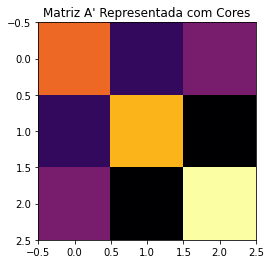

In [130]:
# Plotando a matriz com cores.
# Isso nos ajuda a verificar se implementamos a matriz A' de acordo com a mostrada no Passo 7.

plt.imshow(matriz, interpolation='none', cmap='inferno_r')
plt.title("Matriz A' Representada com Cores")
plt.show()

In [131]:
# Agora, vamos criar uma funcao que monta a matriz colunar B'

def criaMatrizBLinha(n1, n2, epsR1, epsR2, d1, d2):

    # Variaves que serao utilizadas
    n=n1+n2
    l1 = d1/n1
    l2 = d2/n2

    # Primeiro, declaramos uma matriz nula de dimensoes 1xn
    matrizB = np.zeros((n-1,1))

    # Agora, alteramos o primeiro e o ultimo valor, como mostrado no Passo 7.
    # Perceba, porem, que o v0 mostrado eh o nosso vf, e o vn-1 citado eh o nosso v0. 
    matrizB[0][0] = -(eps0*epsR1)*vf/l1
    matrizB[n-2][0] = -(eps0*epsR2)*v0/l2

    return matrizB

matrizB = criaMatrizBLinha(n1, n2, epsR1, epsR2, d1, d2)
matrizB

array([[-0.00e+00],
       [ 0.00e+00],
       [-7.08e-08]])

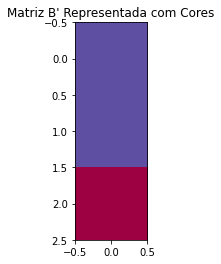

In [132]:
# Plotando com cores

plt.imshow(matrizB, interpolation='none', cmap='Spectral')
plt.title("Matriz B' Representada com Cores")
plt.show()

## Calculando o Potencial

A partir do sistema descrito pelas matrizes $A'$ e $B'$, podemos calcular $V'$ utilizando a função `numpy.linalg.solve`. A célula abaixo faz esse cálculo e exibe o gráfico da solução.

[[0.        ]
 [0.33333333]
 [0.66666667]
 [0.83333333]
 [1.        ]]


Text(0, 0.5, 'Potencial')

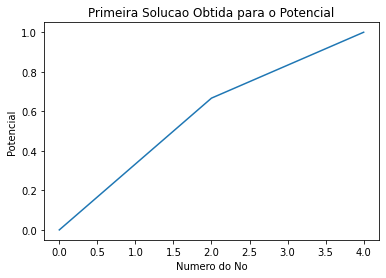

In [133]:
matrizV = np.linalg.solve(matriz, matrizB)

# Adicionamos os nos das pontas para totalizar os 7 nos
matrizV = np.append(vf, matrizV)
matrizV = np.append(matrizV, v0)

matrizV = matrizV.reshape(n+1, 1)

print(matrizV)
plt.plot(matrizV)
plt.title('Primeira Solucao Obtida para o Potencial')
plt.xlabel('Numero do No')
plt.ylabel('Potencial')

In [134]:
# Vamos salvar o numero de n em outra variavel. Vamos usar isso no calculo da capacitancia mais tarde

primeiron1 = n1
primeiron2 = n2
primeiron1, primeiron2

(2, 2)

O método dos elementos finitos nos oferece, porém, uma melhor aproximação da função quando aumentamos a quantidade de elementos. Isso pode ser visualizado ao realizarmos a aproximação da função seno.

Text(0.5, 1.0, 'Aproximacao do seno')

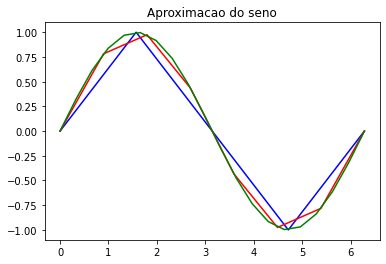

In [135]:
# O terceiro parametro eh o numero de "passos" que damos, similar ao numero de elementos do metodo dos elementos finitos
x = np.linspace(0,2*np.pi,5)
x2 = np.linspace(0,2*np.pi,8)
x3 = np.linspace(0,2*np.pi,20)

plt.plot(x,np.sin(x),color='blue')
plt.plot(x2,np.sin(x2),color='red')
plt.plot(x3,np.sin(x3),color='green')
plt.title('Aproximacao do seno')

Perceba que, ao aumentarmos o número de "passos" acima, a aproximação se torna cada vez mais próxima da função real. 

Agora, vamos aumentar o numero de elementos para o cálculo do potencial e comparar os resultados.

## Potencial para Diferentes Valores de $N_1$ e $N_2$

[[0.        ]
 [0.03703704]
 [0.07407407]
 [0.11111111]
 [0.14814815]
 [0.18518519]
 [0.22222222]
 [0.25925926]
 [0.2962963 ]
 [0.33333333]
 [0.37037037]
 [0.40740741]
 [0.44444444]
 [0.48148148]
 [0.51851852]
 [0.55555556]
 [0.59259259]
 [0.62962963]
 [0.66666667]
 [0.69444444]
 [0.72222222]
 [0.75      ]
 [0.77777778]
 [0.80555556]
 [0.83333333]
 [0.86111111]
 [0.88888889]
 [0.91666667]
 [0.94444444]
 [0.97222222]
 [1.        ]]


Text(0, 0.5, 'Potencial (V)')

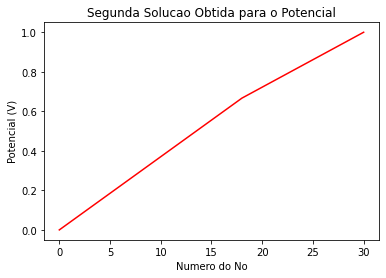

In [136]:
n1 = 18
n2 = 12
n = n1+n2

matrA = criaMatrizALinha(n1,n2,epsR1,epsR2,d1,d2)
matrB = criaMatrizBLinha(n1,n2,epsR1,epsR2,d1,d2)

matrizV2 = np.linalg.solve(matrA, matrB)

# Adicionando o potencial das pontas
matrizV2 = np.append(vf, matrizV2)
matrizV2 = np.append(matrizV2, v0)
matrizV2 = matrizV2.reshape(n+1, 1)

print(matrizV2)
plt.plot(matrizV2, color='red')
plt.title('Segunda Solucao Obtida para o Potencial')
plt.xlabel('Numero do No')
plt.ylabel('Potencial (V)')

In [137]:
segundon1 = n1
segundon2 = n2
segundon1, segundon2

(18, 12)

[[0.        ]
 [0.06666667]
 [0.13333333]
 [0.2       ]
 [0.26666667]
 [0.33333333]
 [0.4       ]
 [0.46666667]
 [0.53333333]
 [0.6       ]
 [0.66666667]
 [0.68333333]
 [0.7       ]
 [0.71666667]
 [0.73333333]
 [0.75      ]
 [0.76666667]
 [0.78333333]
 [0.8       ]
 [0.81666667]
 [0.83333333]
 [0.85      ]
 [0.86666667]
 [0.88333333]
 [0.9       ]
 [0.91666667]
 [0.93333333]
 [0.95      ]
 [0.96666667]
 [0.98333333]
 [1.        ]]


Text(0, 0.5, 'Potencial (V)')

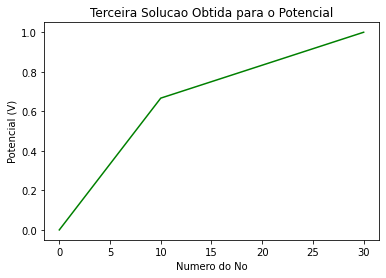

In [138]:
n1 = 10
n2 = 20
n = n1+n2

matrA = criaMatrizALinha(n1,n2,epsR1,epsR2,d1,d2)
matrB = criaMatrizBLinha(n1,n2,epsR1,epsR2,d1,d2)

matrizV3 = np.linalg.solve(matrA, matrB)
matrizV3 = np.append(vf, matrizV3)
matrizV3 = np.append(matrizV3, v0)
matrizV3 = matrizV3.reshape(n+1, 1)

print(matrizV3)
plt.plot(matrizV3, color='green')
plt.title('Terceira Solucao Obtida para o Potencial')
plt.xlabel('Numero do No')
plt.ylabel('Potencial (V)')

In [139]:
terceiron1 = n1
terceiron2 = n2
terceiron1, terceiron2

(10, 20)

Text(0, 0.5, 'Potencial (V)')

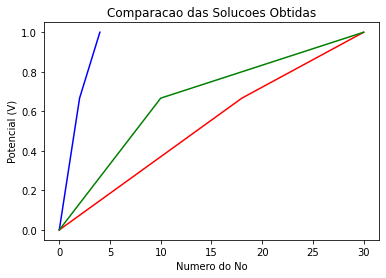

In [140]:
plt.plot(matrizV, color='blue')
plt.plot(matrizV2, color='red')
plt.plot(matrizV3, color='green')
plt.title('Comparacao das Solucoes Obtidas')
plt.xlabel('Numero do No')
plt.ylabel('Potencial (V)')

## Calculando a Capacitância

Observe que não há uma convergência clara entre as curvas acima. Essa discrepância é esperada e acontece porque o eixo x indica o número (ou índice) do nó respectivo, e não a distância ao eixo z.

Agora, vamos realizar o cálculo computacional da capacitância utilizando a fórmula do Passo 8. Faremos isso para as 3 curvas mostradas acima. Além disso, vamos  fazer o cálculo teórico da capacitância a partir da fórmula

$$
C = \frac{\epsilon_1 \epsilon_2 A}{\epsilon_1 d_2 + \epsilon_2 d_1}
$$
onde
$$
\epsilon_1 = \epsilon_0 \epsilon_r^1 
$$
e
$$
\epsilon_2 = \epsilon_0 \epsilon_r^2 
$$

Depois, vamos comparar os resultados obtidos.

In [141]:
# Resultados computacionais

def capac(epsR2,area,n1,n2,d2,martizV):
    n=n1+n2
    l2 = d2/n2
    return eps0*epsR2*area*(martizV[n]-martizV[n-1])/(l2*(martizV[n]-martizV[0]))
         
capac1 = capac(epsR2,area,primeiron1,primeiron2,d2,matrizV)

capac2 = capac(epsR2,area,segundon1,segundon2,d2,matrizV2)

capac3 = capac(epsR2,area,terceiron1,terceiron2,d2,matrizV3)

print(capac1)
print(capac2)
print(capac3)

[4.72e-12]
[4.72e-12]
[4.72e-12]


In [142]:
# Resultado teorico

capacTeo = (eps0*epsR1)*(eps0*epsR2)*area/(((eps0*epsR1)*d2) + ((eps0*epsR2)*d1))
capacTeo

4.719999999999999e-12

## Conclusão

Observe, portanto, que os resultados computacionais pelo método dos elementos finitos foram iguais apesar do número diferente de elementos. Isso aconteceu porque não obtivemos uma aproximação melhor da função almejada, mesmo com mais elementos. Esse fenômeno ocorre quando já temos a melhor aproximação da função com menos elementos. Podemos visualizar isso citando novamente a função seno.

Text(0.5, 1.0, 'Aproximacao do seno')

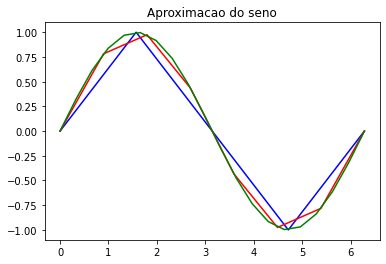

In [143]:
# O terceiro parametro eh o numero de "passos" que damos, similar ao numero de elementos do metodo dos elementos finitos
x = np.linspace(0,2*np.pi,5)
x2 = np.linspace(0,2*np.pi,8)
x3 = np.linspace(0,2*np.pi,20)

plt.plot(x,np.sin(x),color='blue')
plt.plot(x2,np.sin(x2),color='red')
plt.plot(x3,np.sin(x3),color='green')
plt.title('Aproximacao do seno')

Observe que, de fato, houve uma melhora na aproximação com o aumento do número de elementos. Suponha, porém, que tenhamos uma função mais simples, como uma função linear. 

Text(0.5, 1.0, 'Aproximacao de Funcao Linear')

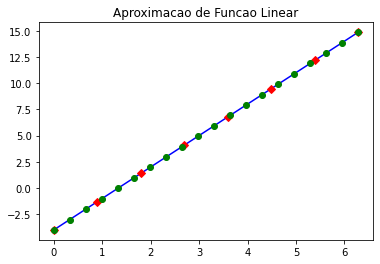

In [144]:
x = np.linspace(0,2*np.pi,5)
x2 = np.linspace(0,2*np.pi,8)
x3 = np.linspace(0,2*np.pi,20)

def y(x):
    a = 3
    b = -4
    return (a*x+b)

plt.plot(x,y(x),'blue')
plt.plot(x2,y(x2),'rD')
plt.plot(x3,y(x3),'go')
plt.title('Aproximacao de Funcao Linear')

Rapidamente percebemos que tal função pode ser perfeitamente aproximada por apenas 1 elemento. 

Dessa forma, um caso similar aconteceu no cálculo do potencial elétrico, e isso pode ser confirmado ao compararmos o valor computacional ao teórico. Como os resultados foram iguais, isso significa que obtivemos a solução ideal pelo método dos elementos finitos em todos os casos. 

Isso mostra o poder e a eficácia desse método de aproximação.

